# **Importing Libraries and Data Loading**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import json
import time
from google.colab import userdata
from google.generativeai import GenerativeModel
import google.generativeai as genai
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os
from groq import Groq
import numpy as np
import textwrap
from IPython.display import display, Markdown

In [ ]:
# Load data
reviews_df = pd.read_csv('/content/drive/MyDrive/researchintern/reviews_processed.csv')

reviews_df.head()

,Text,y,clean_reviews
0,explanation why the edits made under my userna...,0,explanation edits made username hardcore metal...
1,daww he matches this background colour i am se...,0,daww match background colour seemingly stuck t...
2,hey man i am really not trying to edit war it ...,0,hey man really trying edit war guy constantly ...
3,more i can not make any real suggestions on i...,0,make real suggestion improvement wondered sect...
4,you sir are my hero any chance you remember wh...,0,sir hero chance remember page


In [ ]:
len(reviews_df)

163563

# **Groq API**

In [3]:
!pip install groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
os.environ["GROQ_API_KEY"] = "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"
client = Groq(api_key=os.environ["GROQ_API_KEY"])

In [ ]:
test_set_sample_1 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch1.csv')
test_set_sample_2 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch2.csv')
test_set_sample_3 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch3.csv')
test_set_sample_4 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch4.csv')
test_set_sample_5 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch5.csv')
test_set_sample_6 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch6.csv')
test_set_sample_7 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch7.csv')
test_set_sample_8 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch8.csv')
test_set_sample_9 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch9.csv')
test_set_sample_10 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch10.csv')
test_set_sample_11 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch11.csv')
test_set_sample_12 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch12.csv')
test_set_sample_13 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch13.csv')
test_set_sample_14 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch14.csv')
test_set_sample_15 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch15.csv')
test_set_sample_16 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch16.csv')
test_set_sample_17 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch17.csv')
test_set_sample_18 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch18.csv')
test_set_sample_19 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch19.csv')
test_set_sample_20 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch20.csv')
test_set_sample_21 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch21.csv')
test_set_sample_22 = pd.read_csv('/content/drive/MyDrive/researchintern/gemini_batch22.csv')

In [ ]:
test_set_sample_6

,clean_reviews,y,pred_label
0,socialistm two important feature smith concept...,0,0
1,sorry puck one ever said dick number one clear...,1,0
2,alpha version multiplayer beta version,0,0
3,pd seen apart article coat arm sahrawi arab de...,0,1
4,treating forum question arose appropriately an...,0,0
5,military history wikiproject newsletter issue ...,0,0
6,unblock submission response le minute prof adm...,0,0
7,request unblocked granted following reason all...,0,0
8,responded milemoney reasoning edit gave reason...,0,0
9,unblock get lawyer blocking constitutional rig...,1,1


In [ ]:
groq_final_df=pd.DataFrame()

In [ ]:
json_data = test_set_sample_22[['clean_reviews', 'pred_label']].to_json(orient='records')#replace test_set_sample_batchname

prompt = f"""
You are an expert linguist, who is good at classifying review sentiments into abusive (label=1) and non-abusive (label=0).
Reviews are provided between three backticks.
In your output, only return the JSON code back as output - which is provided between three backticks.
Your task is to update predicted labels under 'pred_label' in the JSON code.
Don't make any changes to the JSON code format, please.

```
{json_data}
```
"""
print(prompt)




You are an expert linguist, who is good at classifying review sentiments into abusive (label=1) and non-abusive (label=0).
Reviews are provided between three backticks.
In your output, only return the JSON code back as output - which is provided between three backticks.
Your task is to update predicted labels under 'pred_label' in the JSON code.
Don't make any changes to the JSON code format, please.

```
[{"clean_reviews":"nobody care seriously selfreferential trivia guy","pred_label":1},{"clean_reviews":"understand see see scholarship see stealinggraspinggreed animalistic try culture switch math wil like levantian math amanbir","pred_label":1},{"clean_reviews":"guess u know greek cuz took u forever translatesecond u read carefully say anything u","pred_label":1},{"clean_reviews":"never met photographed keith wigdor whoever asking interfere article keith wigdor resource connection unless somehow deceptive really sort expert artist dec utc","pred_label":0},{"clean_reviews":"holocaust 

In [ ]:
# Get predictions
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="llama3-8b-8192",
)

In [ ]:
# Extract the response text
response_text = chat_completion.choices[0].message.content.strip("```")
response_text

'\n[\n    {"clean_reviews":"nobody care seriously selfreferential trivia guy","pred_label":1},\n    {"clean_reviews":"understand see see scholarship see stealinggraspinggreed animalistic try culture switch math wil like levantian math amanbir","pred_label":1},\n    {"clean_reviews":"guess u know greek cuz took u forever translatesecond u read carefully say anything u","pred_label":1},\n    {"clean_reviews":"never met photographed keith wigdor whoever asking interfere article keith wigdor resource connection unless somehow deceptive really sort expert artist dec utc","pred_label":0},\n    {"clean_reviews":"holocaust denial actual proof jeff rense advocate holocaust denial category holocaust denier removed","pred_label":1},\n    {"clean_reviews":"wikipedia administrator defending massmurdering psychopath","pred_label":1},\n    {"clean_reviews":"censorship understanding supposed warn someone asking administrator block consider warning delete comment","pred_label":0},\n    {"clean_reviews"

In [ ]:
# Convert response back to DataFrame
data = json.loads(response_text)
df_sample = pd.DataFrame(data)

# Merge predictions back to the original sample
test_set_sample_22['pred_label'] = df_sample['pred_label'].values#replace test_set_sample_batchname

In [ ]:
groq_final_df = pd.concat([groq_final_df,test_set_sample_22], ignore_index=True)#replace test_set_sample_batchname
groq_final_df

,clean_reviews,y,pred_label
0,explanation edits made username hardcore metal...,0,1
1,daww match background colour seemingly stuck t...,0,0
2,hey man really trying edit war guy constantly ...,0,1
3,make real suggestion improvement wondered sect...,0,0
4,sir hero chance remember page,0,0
...,...,...,...
545,agf requires think reverting user preferred ve...,0,0
546,accent although cartoon established mario luig...,0,0
547,delete way consider trophy,0,0
548,actually bzfoster unable edit article semiprot...,0,0


In [ ]:
y_true = groq_final_df["y"]
y_pred = groq_final_df["pred_label"]


In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[380 116]
 [  5  49]]


In [ ]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.78


In [ ]:
batch_size = 25
num_batches = int(np.ceil(len(groq_final_df) / batch_size))

# Initialize a list to store accuracies
accuracies = []

# Process each batch
for batch_num in range(num_batches):
    start_index = batch_num * batch_size
    end_index = start_index + batch_size
    batch_df = groq_final_df.iloc[start_index:end_index]

    # Calculate accuracy for the batch
    y_true = batch_df["y"]
    y_pred = batch_df["pred_label"]
    accuracy = accuracy_score(y_true, y_pred)
    accuracies.append(accuracy)

    # Export the batch to a CSV file
    file_path = f'/content/drive/MyDrive/researchintern/groq_batch{batch_num+1}.csv'
    batch_df.to_csv(file_path, index=False)

    print(f"Batch {batch_num+1} exported to {file_path} with accuracy {accuracy:.4f}")


Batch 1 exported to /content/drive/MyDrive/researchintern/groq_batch1.csv with accuracy 0.8000
Batch 2 exported to /content/drive/MyDrive/researchintern/groq_batch2.csv with accuracy 0.8000
Batch 3 exported to /content/drive/MyDrive/researchintern/groq_batch3.csv with accuracy 0.8000
Batch 4 exported to /content/drive/MyDrive/researchintern/groq_batch4.csv with accuracy 0.9200
Batch 5 exported to /content/drive/MyDrive/researchintern/groq_batch5.csv with accuracy 0.8400
Batch 6 exported to /content/drive/MyDrive/researchintern/groq_batch6.csv with accuracy 0.8000
Batch 7 exported to /content/drive/MyDrive/researchintern/groq_batch7.csv with accuracy 0.8400
Batch 8 exported to /content/drive/MyDrive/researchintern/groq_batch8.csv with accuracy 0.9200
Batch 9 exported to /content/drive/MyDrive/researchintern/groq_batch9.csv with accuracy 0.8000
Batch 10 exported to /content/drive/MyDrive/researchintern/groq_batch10.csv with accuracy 0.7600
Batch 11 exported to /content/drive/MyDrive/rese

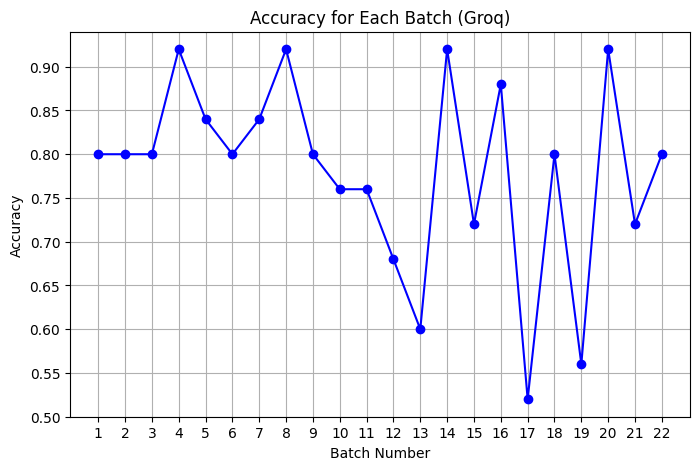

In [ ]:
# Plot for the accuracies
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_batches + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy for Each Batch (Groq)')
plt.xlabel('Batch Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_batches + 1))
plt.grid(True)

# **GEMINI API**

In [5]:
!pip install -q -U google-generativeai

In [ ]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-pro')

In [ ]:
# Function to process each batch
def gemini_completion_function(batch, current_batch, total_batch):
    print(f"Now processing batch#: {current_batch+1} of {total_batch}")

    json_data = batch[['clean_reviews','pred_label']].to_json(orient='records')

    prompt = f"""
    You are an expert linguist, who is good at classifying review sentiments into abusive (label=1) and non-abusive (label=0).
    Reviews are provided between three backticks.
    In your output, only return the JSON code back as output - which is provided between three backticks.
    Your task is to update predicted labels under 'pred_label' in the JSON code.
    Don't make any changes to the JSON code format, please.
    Error handling instruction: In case a Review violates API policy, please assign it default sentiment as abusive (label=1).

    ```
    {json_data}
    ```
    """

    try:
        response = model.generate_content(prompt)
        time.sleep(5)
        return response

    except Exception as e:
        print(f"Error processing batch {current_batch+1}: {e}")
        return None


In [ ]:
num_samples = 700
batch_size = 25

test_set_sample = reviews_df.iloc[:num_samples].copy()
test_set_sample['pred_label'] = ''

In [ ]:
# Split the data into batches
batches = [test_set_sample[i:i + batch_size] for i in range(0, len(test_set_sample), batch_size)]
batch_count = len(batches)

responses = []

for i in range(batch_count):
    response = gemini_completion_function(batches[i], i, batch_count)
    if response:
        responses.append(response)
    else:
        print(f"Skipping batch {i+1} due to error.")


Now processing batch#: 1 of 28
Now processing batch#: 2 of 28
Now processing batch#: 3 of 28
Now processing batch#: 4 of 28
Now processing batch#: 5 of 28
Now processing batch#: 6 of 28
Now processing batch#: 7 of 28
Now processing batch#: 8 of 28
Now processing batch#: 9 of 28
Now processing batch#: 10 of 28
Now processing batch#: 11 of 28
Now processing batch#: 12 of 28
Now processing batch#: 13 of 28
Now processing batch#: 14 of 28
Now processing batch#: 15 of 28
Now processing batch#: 16 of 28
Now processing batch#: 17 of 28
Now processing batch#: 18 of 28
Now processing batch#: 19 of 28
Now processing batch#: 20 of 28
Now processing batch#: 21 of 28
Now processing batch#: 22 of 28
Now processing batch#: 23 of 28
Now processing batch#: 24 of 28
Now processing batch#: 25 of 28
Now processing batch#: 26 of 28
Now processing batch#: 27 of 28
Now processing batch#: 28 of 28


In [ ]:
# Process and combine all responses
df_total = pd.DataFrame()
batch_indices_used = []

for idx, response in enumerate(responses):
    if response and response.parts:
        text = response.parts[0].text
        if text:
            # Clean the response text
            json_data = text.strip().strip("```").strip()
            try:
                data = json.loads(json_data)
                df_temp = pd.DataFrame(data)
                df_total = pd.concat([df_total, df_temp], ignore_index=True)
                batch_indices_used.append(idx)
                print(f"Batch {idx+1} successfully concatenated.")
            except json.JSONDecodeError as e:
                print(f"JSON decode error in batch {idx+1}: {e}")
    else:
        print(f"Skipping batch {idx+1} due to missing response or parts.")

Batch 1 successfully concatenated.
Skipping batch 2 due to missing response or parts.
Batch 3 successfully concatenated.
Batch 4 successfully concatenated.
Batch 5 successfully concatenated.
Batch 6 successfully concatenated.
Batch 7 successfully concatenated.
Skipping batch 8 due to missing response or parts.
Skipping batch 9 due to missing response or parts.
Batch 10 successfully concatenated.
Batch 11 successfully concatenated.
Skipping batch 12 due to missing response or parts.
Batch 13 successfully concatenated.
Batch 14 successfully concatenated.
Batch 15 successfully concatenated.
Batch 16 successfully concatenated.
Batch 17 successfully concatenated.
Batch 18 successfully concatenated.
Batch 19 successfully concatenated.
Batch 20 successfully concatenated.
Skipping batch 21 due to missing response or parts.
Batch 22 successfully concatenated.
Batch 23 successfully concatenated.
Batch 24 successfully concatenated.
Batch 25 successfully concatenated.
Batch 26 successfully concate

In [ ]:
df_total

,clean_reviews,pred_label
0,explanation edits made username hardcore metal...,0
1,daww match background colour seemingly stuck t...,0
2,hey man really trying edit war guy constantly ...,0
3,make real suggestion improvement wondered sect...,0
4,sir hero chance remember page,0
...,...,...
545,agf requires think reverting user preferred ve...,0
546,accent although cartoon established mario luig...,0
547,delete way consider trophy,0
548,actually bzfoster unable edit article semiprot...,0


In [ ]:
test_set_sample_new = pd.concat([batches[i] for i in batch_indices_used], ignore_index=True)
test_set_sample_new['pred_label'] = df_total['pred_label'].values


In [ ]:
test_set_sample_new

,Text,y,clean_reviews,pred_label
0,explanation why the edits made under my userna...,0,explanation edits made username hardcore metal...,0
1,daww he matches this background colour i am se...,0,daww match background colour seemingly stuck t...,0
2,hey man i am really not trying to edit war it ...,0,hey man really trying edit war guy constantly ...,0
3,more i can not make any real suggestions on i...,0,make real suggestion improvement wondered sect...,0
4,you sir are my hero any chance you remember wh...,0,sir hero chance remember page,0
...,...,...,...,...
545,agf requires me not to think you were revertin...,0,agf requires think reverting user preferred ve...,0
546,accents although the cartoon established mario...,0,accent although cartoon established mario luig...,0
547,delete this no way i consider it a trophy,0,delete way consider trophy,0
548,actually bzfoster will be unable to edit the a...,0,actually bzfoster unable edit article semiprot...,0


In [ ]:
 # 'y' is your true labels column in the original DataFrame
y_true = test_set_sample_new["y"]
y_pred = test_set_sample_new["pred_label"]

In [ ]:
accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.8145454545454546


In [ ]:
test_set_sample_new[['Text', 'y', 'clean_reviews']].to_csv('/content/drive/MyDrive/researchintern/gemini_550.csv', index=False)

In [ ]:
batch_size = 25
num_batches = len(test_set_sample_new) // batch_size + (1 if len(test_set_sample_new) % batch_size != 0 else 0)

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch = test_set_sample_new.iloc[start_idx:end_idx]
    output_file_path = f'/content/drive/MyDrive/researchintern/gemini_batch{i+1}.csv'
    batch.to_csv(output_file_path, index=False, columns=['clean_reviews', 'y', 'pred_label'])
    print(f"Batch {i+1} saved to {output_file_path}")

Batch 1 saved to /content/drive/MyDrive/researchintern/gemini_batch1.csv
Batch 2 saved to /content/drive/MyDrive/researchintern/gemini_batch2.csv
Batch 3 saved to /content/drive/MyDrive/researchintern/gemini_batch3.csv
Batch 4 saved to /content/drive/MyDrive/researchintern/gemini_batch4.csv
Batch 5 saved to /content/drive/MyDrive/researchintern/gemini_batch5.csv
Batch 6 saved to /content/drive/MyDrive/researchintern/gemini_batch6.csv
Batch 7 saved to /content/drive/MyDrive/researchintern/gemini_batch7.csv
Batch 8 saved to /content/drive/MyDrive/researchintern/gemini_batch8.csv
Batch 9 saved to /content/drive/MyDrive/researchintern/gemini_batch9.csv
Batch 10 saved to /content/drive/MyDrive/researchintern/gemini_batch10.csv
Batch 11 saved to /content/drive/MyDrive/researchintern/gemini_batch11.csv
Batch 12 saved to /content/drive/MyDrive/researchintern/gemini_batch12.csv
Batch 13 saved to /content/drive/MyDrive/researchintern/gemini_batch13.csv
Batch 14 saved to /content/drive/MyDrive/re

In [ ]:
# List to store accuracies
accuracies = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch = test_set_sample_new.iloc[start_idx:end_idx]
    y_true_batch = batch["y"]
    y_pred_batch = batch["pred_label"]
    accuracy = accuracy_score(y_true_batch, y_pred_batch)
    accuracies.append(accuracy)

In [ ]:
print(accuracies)

[0.88, 0.8, 0.8, 0.92, 0.96, 0.84, 0.88, 0.96, 0.84, 0.84, 0.96, 0.68, 0.64, 0.92, 0.72, 0.88, 0.52, 0.8, 0.56, 0.92, 0.8, 0.8]


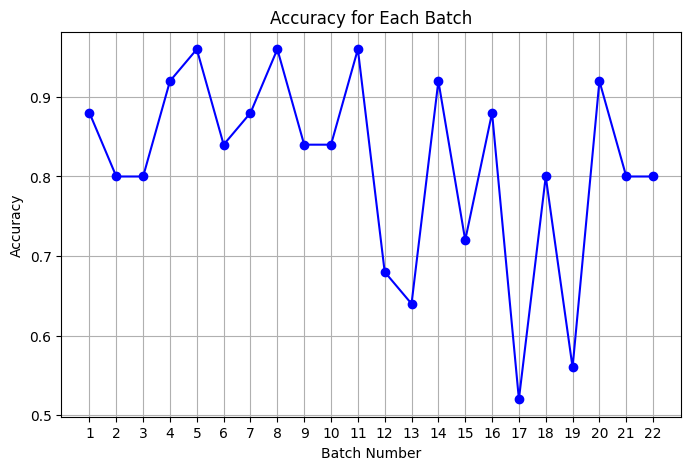

In [ ]:
# Plot for the accuracies
plt.figure(figsize=(8,5))
plt.plot(range(1, num_batches + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy for Each Batch')
plt.xlabel('Batch Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_batches + 1))
plt.grid(True)